In [12]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

warnings.filterwarnings("ignore")

In [2]:
file_path = "merged_CICIDS2017.csv"
data = pd.read_csv(file_path)

In [3]:
# Display basic dataset information
print("Original Dataset shape:", data.shape)

Original Dataset shape: (2830743, 79)


In [4]:
# Handle Missing Values
missing_values = data.isnull().sum()
print("Missing values per column:\n\n", missing_values)

# Fill missing values with the median for numerical columns
data = data.fillna(data.median())

# Remove duplicates
data = data.drop_duplicates()
print("Dataset shape after removing duplicates:", data.shape)

# Inspect column names to identify the correct target column
print("Column names in the dataset:", data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Set the correct target column name
target_column = "Label"

# Encode target labels
label_encoder = LabelEncoder()
data[target_column] = label_encoder.fit_transform(data[target_column])


Missing values per column:

  Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
Dataset shape after removing duplicates: (2522362, 79)
Column names in the dataset: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Ma

In [5]:
# Separate features and target
X = data.drop(columns=[target_column])  # Features
y = data[target_column]                # Target

In [6]:
# Check for infinity or very large values
print("Contains Inf values:", np.isinf(X).any().any())
print("Contains NaN values:", np.isnan(X).any().any())

Contains Inf values: True
Contains NaN values: False


In [7]:
# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with column mean (or median)
X.fillna(X.mean(), inplace=True)

In [8]:
print("Contains Inf values (after fix):", np.isinf(X).any().any())
print("Contains NaN values (after fix):", np.isnan(X).any().any())

Contains Inf values (after fix): False
Contains NaN values (after fix): False


In [9]:
# ANOVA 

In [13]:
# Step 6: Perform ANOVA F-Test for Feature Selection
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Top {k} selected features based on ANOVA:")
print(selected_features)

Top 10 selected features based on ANOVA:
Index(['Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Max', 'Fwd IAT Std',
       'Packet Length Std', 'Avg Bwd Segment Size', 'Idle Mean', 'Idle Max',
       'Idle Min'],
      dtype='object')


In [ ]:
# Random Forest

Accuracy: 98.86971081353599
Precision: 98.81959451270464
Recall: 98.86971081353599
F1 Score: 98.79880675490529


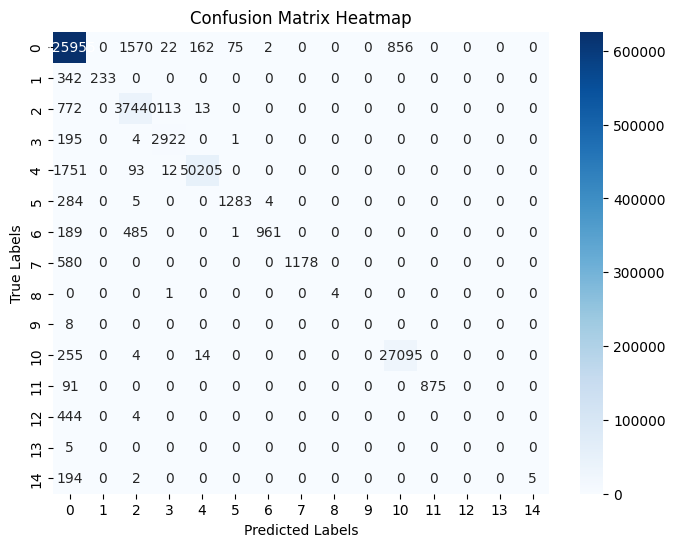

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Random Forest with optimizations
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_selected, y_train)
# Predictions and evaluation metrics
y_pred = rf_classifier.predict(X_test_selected)

# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


# Display metrics
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Adaboost

Accuracy: 0.8501405427978258
Precision: 0.7721394232352684
Recall: 0.8501405427978258
F1 Score: 0.7959267646430302


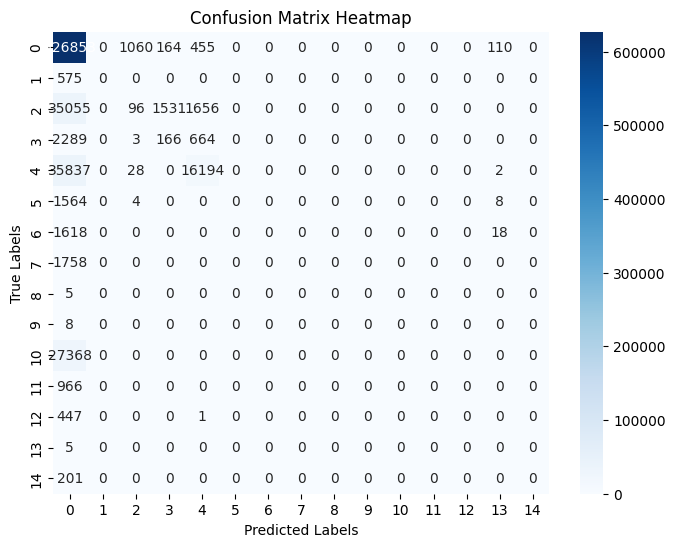

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train AdaBoost with optimizations
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(X_train_selected, y_train)

# Predictions and evaluation metrics
y_pred = ada_classifier.predict(X_test_selected)

# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
